<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li><b>4. Try out any of the previous examples and exercises by using any or many
of the following additional plotting libraries:<br /><br />
</li>
<ul>
<li><b>Matplotlib (this is the most common in addition to seaborn,
especially regarding machine learning, recommended to learn)</b><br />
<a href="https://matplotlib.org/stable/tutorials/index.html#introductory">https://matplotlib.org/stable/tutorials/index.html#introductory</a><br /><br /></li>
<li><b>Plotly</b><br />
<a href="https://plotly.com/python/getting-started/">https://plotly.com/python/getting-started/</a><br /><br /></li>
<li><b>Bokeh</b><br /><a href="https://docs.bokeh.org/en/latest/docs/user_guide.html">https://docs.bokeh.org/en/latest/docs/user_guide.html</a>
<br /><br /></li>
</ul>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/charts.png" />


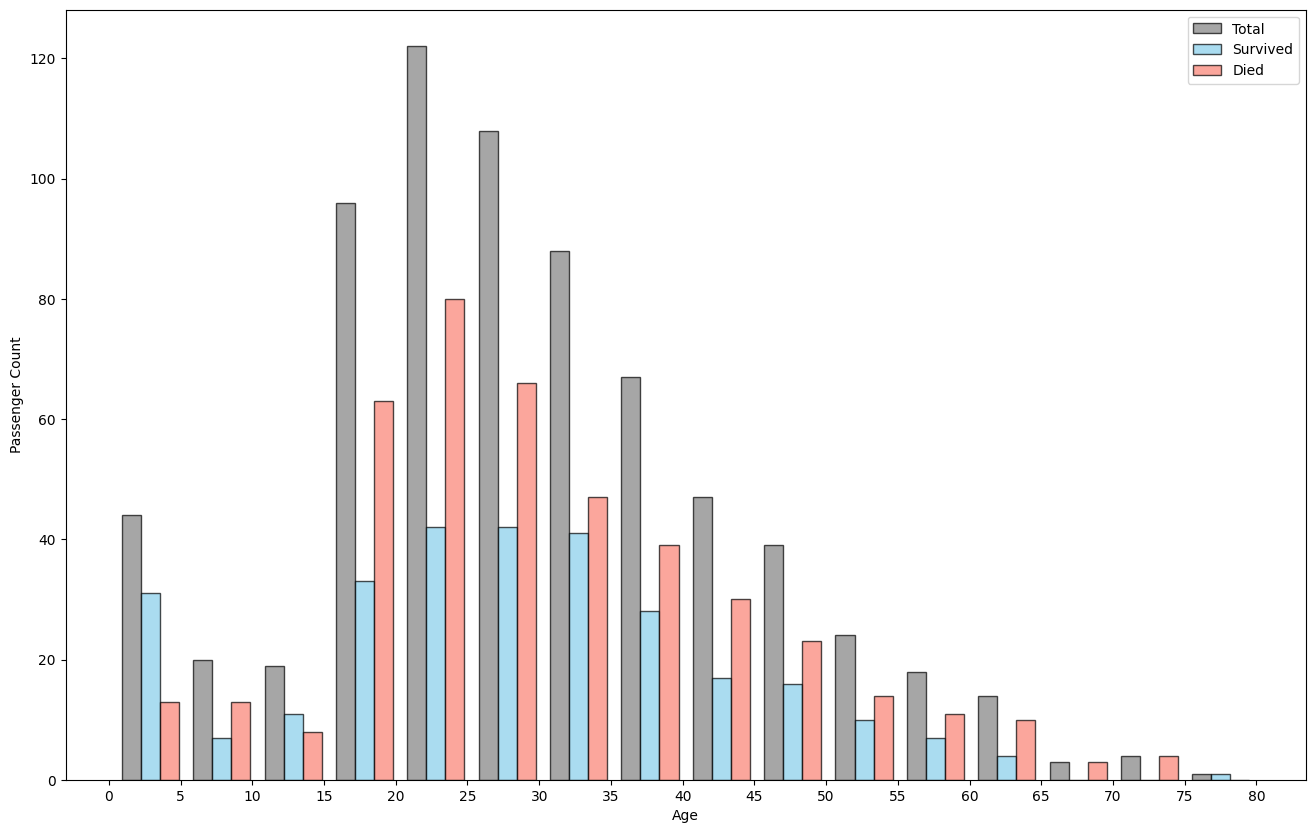

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
df_titanic = sns.load_dataset('titanic')
df_age = df_titanic['age'].dropna()
df_survived = df_titanic[df_titanic['survived'] == 1]['age'].dropna()
df_died = df_titanic[df_titanic['survived'] == 0]['age'].dropna()

# Determine the range for age bins
age_range = (min(df_age), max(df_age))

# Plot histograms for passengers that survived and died next to each other
plt.hist([df_age, df_survived, df_died], bins=16, range=age_range, color=['grey', 'skyblue', 'salmon'], edgecolor='black', alpha=0.7, label=['Total', 'Survived', 'Died'])
# Set x-axis ticks and labels for increments of 5
plt.xticks(np.arange(0, max(age_range)+1, 5))
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.legend()

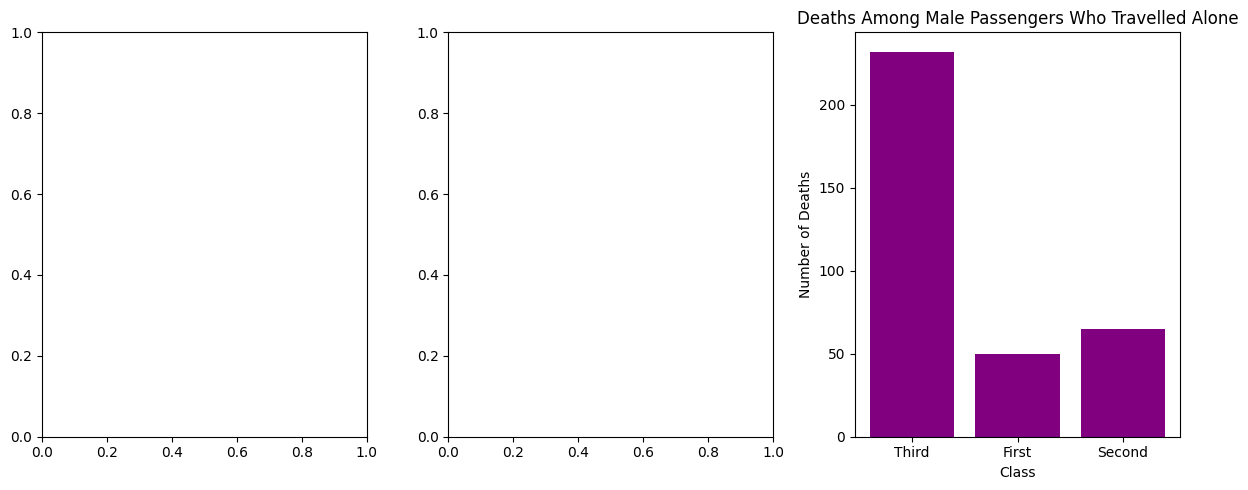

In [43]:
# deceased male passengers who travelled alone
df_died = df_titanic[df_titanic['survived'] == 0]
dead_male_alone_passengers = df_died[(df_died['sex'] == 'male') & (df_died['alone'] == True)]

# survived male passengers who travelled alone
df_survived = df_titanic[df_titanic['survived'] == 1]
survived_male_alone_passengers = df_survived[(df_survived['sex'] == 'male') & (df_survived['alone'] == True)]

# counts by class 
dead_male_alone_counts = dead_male_alone_passengers['class'].value_counts()
survived_male_alone_counts = survived_male_alone_passengers['class'].value_counts()

# Create subplots for each category
fig, (ax1, ax2) = plt.subplots(1, 3, figsize=(12, 5))

# Plot histogram for dead male passengers who travelled alone by class
ax1.bar(survived_male_alone_counts.index, survived_male_alone_counts.values, color='purple')
ax1.set_title('Surviving Male Passengers Who Travelled Alone')
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Deaths')
ax1.grid(axis='y')

# Plot histogram for dead male passengers who travelled alone by class
ax2.bar(dead_male_alone_counts.index, dead_male_alone_counts.values, color='purple')
ax2.set_title('Deaths Among Male Passengers Who Travelled Alone')
ax2.set_xlabel('Class')
ax2.set_ylabel('Number of Deaths')
ax2.grid(axis='y')

plt.tight_layout()
plt.show()


<ul>
<li><b>5. Try out any of the datasets below, or find yourself an interesting csvdataset from kaggle.com!  </b><br>

Use all your skills in numpy, pandas and seaborn, and find out features in
the data. <br ><br />
<b>Was there something that is surprising in the dataset? What
interesting correlations did you find?</b>
<br><br>
<b>Some interesting datasets, examples (you can find you own too!):</b>
</li>
<ul>
<li><a href="https://www.kaggle.com/anamvillalpando/world-happiness-ranking">https://www.kaggle.com/anamvillalpando/world-happiness-ranking</a></li>
<li><a href="https://www.kaggle.com/sakshigoyal7/credit-card-customers">https://www.kaggle.com/sakshigoyal7/credit-card-customers</a></li>
<li><a href="https://www.kaggle.com/lucabasa/dutch-energy">https://www.kaggle.com/lucabasa/dutch-energy</a></li>
<li><a href="https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv">https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv</a></li>
<li><a href="https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv">https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv</a></li>
<li><a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv">https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv</a><br /><br /></li>
</ul>
<li><b>Note:</b> These datasets can be quite rough to handle at first, feel free to
ask tips from your instructor if some dataset interests you!</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />